## Apple Report 2022

#### Hemant Thapa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyttsx3
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Apple Inc. is a multinational technology company that is best known for its innovative products, including the iPhone, iPad, and Mac computers. The company was founded in 1976 by Steve Jobs, Steve Wozniak, and Ronald Wayne, and it has since become one of the world's largest and most valuable companies. Apple has a strong brand image and is well-known for its sleek and user-friendly products, as well as its commitment to privacy and security. In addition to its consumer products, Apple also offers a range of services, including the App Store, Apple Music, and iCloud. The company's products and services are used by millions of people around the world, making Apple a leader in the technology industry.

Apple Inc. is one of the largest technology companies in the world, and has a market capitalization of over $2 trillion as of 2021. The company designs, develops, and sells consumer electronics, computer software, and online services. Apple's product line includes the iPhone smartphone, the iPad tablet computer, the Mac personal computer, the iPod portable media player, the Apple Watch smartwatch, the Apple TV digital media player, and the HomePod smart speaker.

Apple has retail stores in over 50 countries, including over 500 retail locations in the United States alone. The company's stores are designed to be a place for customers to try out and purchase Apple products, as well as receive support and training.

Apple's products are manufactured by a variety of companies, including Foxconn Technology Group, which is based in Taiwan. The company has faced criticism for the working conditions in its factories, and has taken steps to improve conditions and increase transparency. Despite these challenges, Apple remains one of the most valuable and influential companies in the world, and continues to push the boundaries of technology and design.

#### 1. Creating dataset from apple financials. 
https://investor.apple.com/investor-relations/default.aspx

In [2]:
apple = [['Revenue', 170910, 182795, 233715, 215639, 229234, 265595, 260174, 274515, 365817, 394328],
        ['Revenue Growth', 9.2, 7.0, 27.9, -7.7, 6.3, 15.9, -2.0, 5.5, 33.3, 7.8],
        ['Gross Profit', 64304, 70537, 93626, 84263, 88186, 101839, 98392, 104956, 152836, 170782],
        ['Gross Margin %', 37.6, 38.6, 40.1, 39.1, 38.5, 38.3, 37.8, 38.2, 41.8, 43.3],
        ['Operating Profit', 48999, 52503, 71230, 60024, 61344, 70898, 63930, 66288, 108949, 119437],
        ['Operating Margin %', 28.7, 28.7, 30.5, 27.8, 26.8, 26.7, 24.6, 24.1, 29.8, 30.3],
        ['Earnings Per Share', 1.42, 1.61, 2.31, 2.08, 2.30, 2.98, 2.97, 3.28, 5.61, 6.11],
        ['EPS Growth', -10.0, 13.6, 42.9, -9.8, 10.8, 29.4, -0.3, 10.4, 71.0, 8.9],
        ['Dividends Per Share', 0.41, 0.45, 0.50, 0.55, 0.60, 0.68, 0.75, 0.80, 0.85, 0.90],
        ['Dividend Growth', 328.4, 11.3, 9.3, 10.1, 10.1, 13.3, 10.3, 6.0, 6.9, 5.9],
        ['Return on Assets', 19.3, 18.0, 20.5, 14.9, 13.9, 16.1, 15.7, 17.3, 28.1, 28.4],
        ['Return on Equity', 30.6, 33.6, 46.2, 36.9, 36.9, 49.4, 55.9, 73.7, 147.4, 175.5],
        ['Return on Invested Capital', 28.6, 27.5, 32.3, 22.9, 20.8, 25.3, 26.3, 30.5, 51.8, 55.7]]
columns = ['Metric', 
           '2013', 
           '2014', 
           '2015', 
           '2016', 
           '2017', 
           '2018', 
           '2019', 
           '2020', 
           '2021', 
           '2022']

#### 2. Creating dataframe

In [3]:
df = pd.DataFrame(apple, columns=columns)

In [4]:
df

,Metric,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Revenue,170910.00,182795.00,233715.00,215639.00,229234.0,265595.00,260174.00,274515.00,365817.00,394328.00
1,Revenue Growth,9.20,7.00,27.90,-7.70,6.3,15.90,-2.00,5.50,33.30,7.80
2,Gross Profit,64304.00,70537.00,93626.00,84263.00,88186.0,101839.00,98392.00,104956.00,152836.00,170782.00
3,Gross Margin %,37.60,38.60,40.10,39.10,38.5,38.30,37.80,38.20,41.80,43.30
4,Operating Profit,48999.00,52503.00,71230.00,60024.00,61344.0,70898.00,63930.00,66288.00,108949.00,119437.00
5,Operating Margin %,28.70,28.70,30.50,27.80,26.8,26.70,24.60,24.10,29.80,30.30
6,Earnings Per Share,1.42,1.61,2.31,2.08,2.3,2.98,2.97,3.28,5.61,6.11
7,EPS Growth,-10.00,13.60,42.90,-9.80,10.8,29.40,-0.30,10.40,71.00,8.90
8,Dividends Per Share,0.41,0.45,0.50,0.55,0.6,0.68,0.75,0.80,0.85,0.90
9,Dividend Growth,328.40,11.30,9.30,10.10,10.1,13.30,10.30,6.00,6.90,5.90


#### 3. Return on Invested Capital

In [5]:
roic_data = df[df['Metric'] == 'Return on Invested Capital'].iloc[0, 1:].tolist()

In [6]:
roic_data

[28.6, 27.5, 32.3, 22.9, 20.8, 25.3, 26.3, 30.5, 51.8, 55.7]

#### 4. Ploting ROI with respect to time

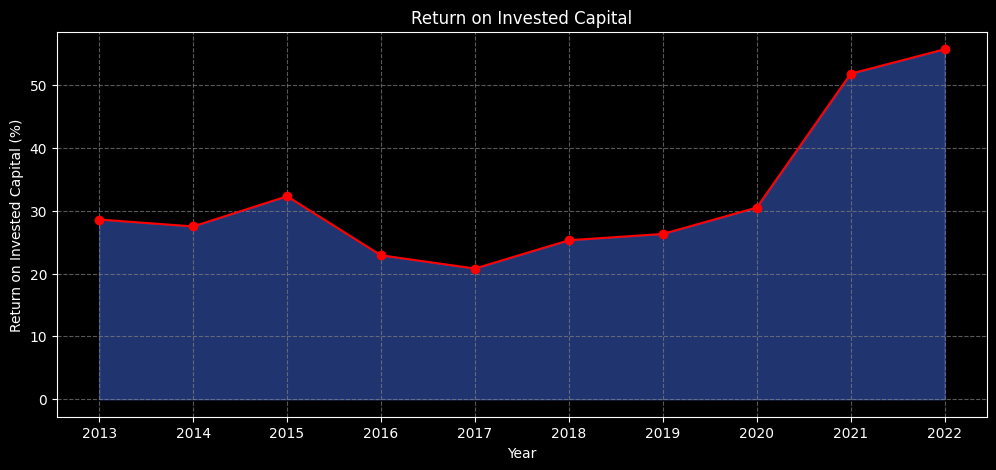

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(12,5))
plt.plot(columns[1:], roic_data, 'o-', color="red")
plt.fill_between(columns[1:], 0, roic_data, alpha=0.5, color="royalblue")
plt.title("Return on Invested Capital")
plt.xlabel("Year")
plt.ylabel("Return on Invested Capital (%)")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.show()

#### 5. Regression Analaysis

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
revenue = df[df['Metric'] == 'Revenue'].iloc[0, 1:].tolist()
gross_profit = df[df['Metric'] == 'Gross Profit'].iloc[0, 1:].tolist()
operating_profit = df[df['Metric'] == 'Operating Profit'].iloc[0, 1:].tolist()
earnings_per_share = df[df['Metric'] == 'Earnings Per Share'].iloc[0, 1:].tolist()
dividends_per_share = df[df['Metric'] == 'Dividends Per Share'].iloc[0, 1:].tolist()

In [10]:
revenue

[170910.0,
 182795.0,
 233715.0,
 215639.0,
 229234.0,
 265595.0,
 260174.0,
 274515.0,
 365817.0,
 394328.0]

In [11]:
gross_profit

[64304.0,
 70537.0,
 93626.0,
 84263.0,
 88186.0,
 101839.0,
 98392.0,
 104956.0,
 152836.0,
 170782.0]

In [12]:
operating_profit

[48999.0,
 52503.0,
 71230.0,
 60024.0,
 61344.0,
 70898.0,
 63930.0,
 66288.0,
 108949.0,
 119437.0]

In [13]:
earnings_per_share

[1.42, 1.61, 2.31, 2.08, 2.3, 2.98, 2.97, 3.28, 5.61, 6.11]

In [14]:
dividends_per_share

[0.41, 0.45, 0.5, 0.55, 0.6, 0.68, 0.75, 0.8, 0.85, 0.9]

#### 6. Features Selection

In [15]:
financial_data = np.array([revenue, gross_profit, operating_profit, earnings_per_share, dividends_per_share])
financial_data = financial_data.T
financial_data

array([[1.70910e+05, 6.43040e+04, 4.89990e+04, 1.42000e+00, 4.10000e-01],
       [1.82795e+05, 7.05370e+04, 5.25030e+04, 1.61000e+00, 4.50000e-01],
       [2.33715e+05, 9.36260e+04, 7.12300e+04, 2.31000e+00, 5.00000e-01],
       [2.15639e+05, 8.42630e+04, 6.00240e+04, 2.08000e+00, 5.50000e-01],
       [2.29234e+05, 8.81860e+04, 6.13440e+04, 2.30000e+00, 6.00000e-01],
       [2.65595e+05, 1.01839e+05, 7.08980e+04, 2.98000e+00, 6.80000e-01],
       [2.60174e+05, 9.83920e+04, 6.39300e+04, 2.97000e+00, 7.50000e-01],
       [2.74515e+05, 1.04956e+05, 6.62880e+04, 3.28000e+00, 8.00000e-01],
       [3.65817e+05, 1.52836e+05, 1.08949e+05, 5.61000e+00, 8.50000e-01],
       [3.94328e+05, 1.70782e+05, 1.19437e+05, 6.11000e+00, 9.00000e-01]])

In [16]:
years = np.array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
years

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022]])

y = β0 + β1 * Year + β2 * Revenue + β3 * Gross Profit + β4 * Operating Profit + β5 * Earnings Per Share + β6 * Dividends Per Share

Here, y represents the financial metric, Year is the independent variable, and β0, β1, β2, β3, β4, β5, and β6 are the coefficients estimated by the linear regression model. The coefficients represent the change in the financial metric for each unit change in the year and the respective financial metric.

#### 7. Trainning Model

In [17]:
reg = LinearRegression().fit(years, financial_data)
reg

LinearRegression()

In [18]:
intercept = reg.intercept_
coefficients = reg.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [-4.45644668e+07 -2.00363854e+07 -1.24682486e+07 -9.55673455e+02
 -1.14165091e+02]
Coefficients: [[2.22174667e+04]
 [9.98233333e+03]
 [6.21591515e+03]
 [4.75212121e-01]
 [5.69090909e-02]]


#### 8. Prediction

In [19]:
predictions = reg.predict(years)
predictions

array([[1.59293600e+05, 5.80516000e+04, 4.43885818e+04, 9.28545455e-01,
        3.92909091e-01],
       [1.81511067e+05, 6.80339333e+04, 5.06044970e+04, 1.40375758e+00,
        4.49818182e-01],
       [2.03728533e+05, 7.80162667e+04, 5.68204121e+04, 1.87896970e+00,
        5.06727273e-01],
       [2.25946000e+05, 8.79986000e+04, 6.30363273e+04, 2.35418182e+00,
        5.63636364e-01],
       [2.48163467e+05, 9.79809333e+04, 6.92522424e+04, 2.82939394e+00,
        6.20545455e-01],
       [2.70380933e+05, 1.07963267e+05, 7.54681576e+04, 3.30460606e+00,
        6.77454545e-01],
       [2.92598400e+05, 1.17945600e+05, 8.16840727e+04, 3.77981818e+00,
        7.34363636e-01],
       [3.14815867e+05, 1.27927933e+05, 8.78999879e+04, 4.25503030e+00,
        7.91272727e-01],
       [3.37033333e+05, 1.37910267e+05, 9.41159030e+04, 4.73024242e+00,
        8.48181818e-01],
       [3.59250800e+05, 1.47892600e+05, 1.00331818e+05, 5.20545455e+00,
        9.05090909e-01]])

#### 9. Plotting and checking performance 

Plotting 'Revenue', 'Gross Profit', 'Operating Profit', 'Earnings Per Share', and  'Dividends Per Share'show psotive upward trend.

In [20]:
colors = ['blue', 'red', 'green', 'white', 'purple']
metrics = ['Revenue', 'Gross Profit', 'Operating Profit', 'Earnings Per Share', 'Dividends Per Share']

In [21]:
num_metrics = financial_data.shape[1]

In [22]:
num_rows = 2  
num_cols = (num_metrics + num_rows - 1) // num_rows

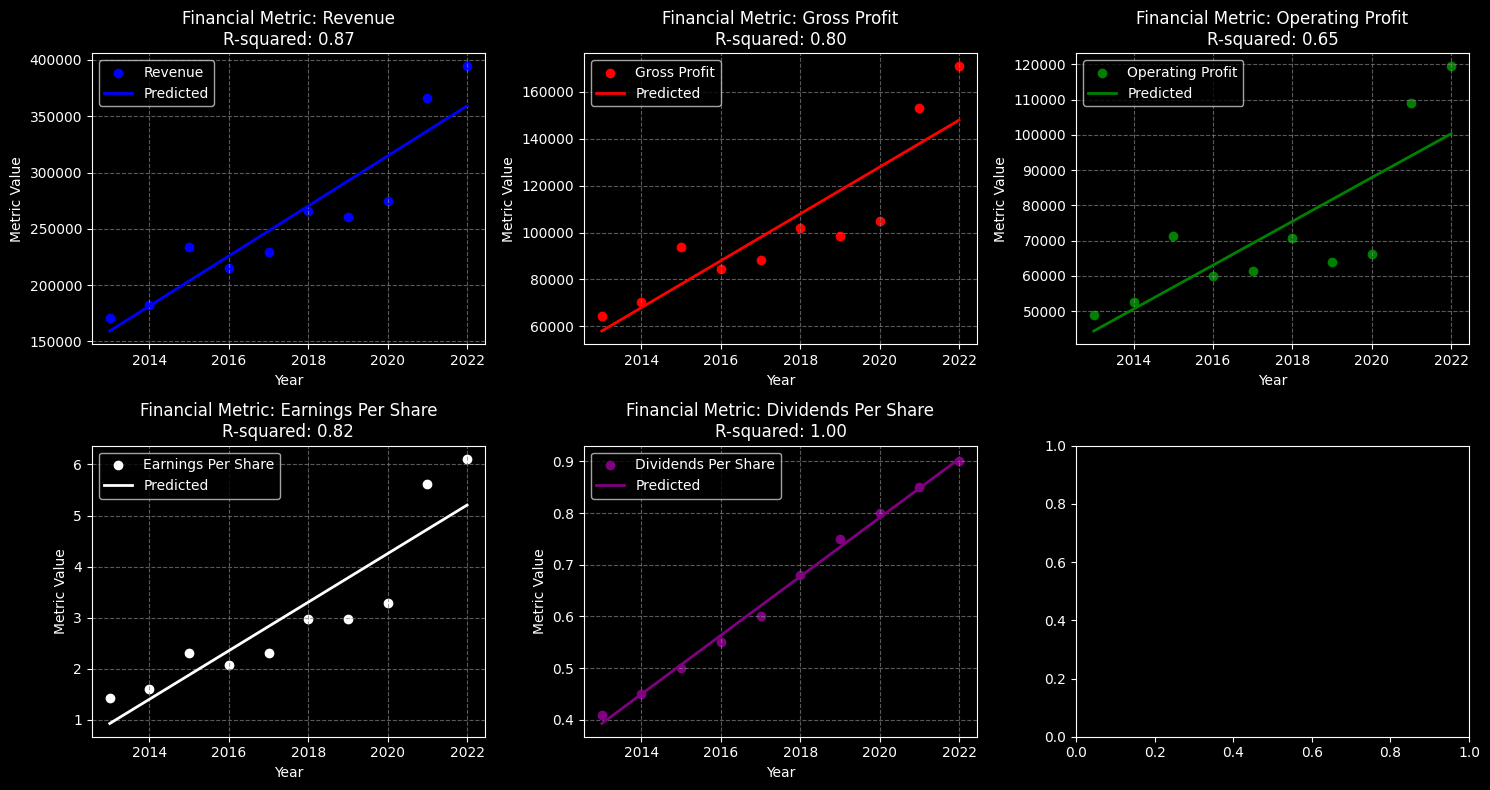

In [23]:

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

if num_rows == 1 or num_cols == 1:
    axs = axs.ravel()

for i in range(num_metrics):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col]
    
    y_true = financial_data[:, i]
    y_pred = predictions[:, i]
    
    ax.scatter(years, y_true, color=colors[i], label=metrics[i])
    ax.plot(years, y_pred, color=colors[i], linewidth=2, label="Predicted")

    #R-squared
    r_squared = r2_score(y_true, y_pred)
    #R-squared in the subplot title
    ax.set_title(f"Financial Metric: {metrics[i]}\nR-squared: {r_squared:.2f}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Metric Value")
    ax.grid(linestyle='--', color='gray', alpha=0.7)
    ax.legend()


plt.tight_layout()
plt.show()

#### 10. Simple Moving Averages

In [24]:
def stock(ticker, time):
    apple = yf.Ticker(ticker).history(period=time)
    close_price = apple['Close']
    return close_price

In [25]:
stock("AAPL","2y")[:5]

Date
2022-01-18 00:00:00-05:00    167.881821
2022-01-19 00:00:00-05:00    164.352158
2022-01-20 00:00:00-05:00    162.651566
2022-01-21 00:00:00-05:00    160.575302
2022-01-24 00:00:00-05:00    159.794220
Name: Close, dtype: float64

In [26]:
close_price_2year = stock("AAPL","2y")
close_price_1year = stock("AAPL","1y")
close_price_6m = stock("AAPL","126d")
close_price_3m = stock("AAPL","90d")

In [27]:
close_price_2year_mean = close_price_2year.mean()
close_price_1year_mean = close_price_1year.mean()
close_price_6m_mean = close_price_6m.mean()
close_price_3m_mean = close_price_3m.mean()

print("Mean Close Price (2 Years):", close_price_2year_mean)
print("Mean Close Price (1 Year):", close_price_1year_mean)
print("Mean Close Price (6 Months):", close_price_6m_mean)
print("Mean Close Price (3 Months):", close_price_3m_mean)

Mean Close Price (2 Years): 163.0352422748497
Mean Close Price (1 Year): 174.1560687182909
Mean Close Price (6 Months): 183.3223172142392
Mean Close Price (3 Months): 182.71905924479168


##### Creating 30 days moving average interval from 2 year chart

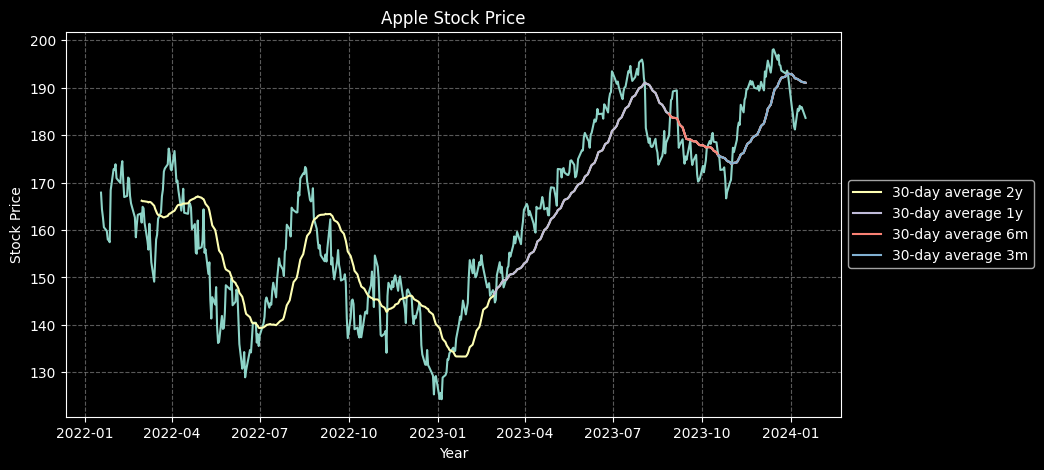

In [28]:
plt.figure(figsize=(10,5))
plt.plot(close_price_2year)
plt.plot(close_price_2year.rolling(30).mean(), label='30-day average 2y')
plt.plot(close_price_1year.rolling(30).mean(), label='30-day average 1y')
plt.plot(close_price_6m.rolling(30).mean(), label='30-day average 6m')
plt.plot(close_price_3m.rolling(30).mean(), label='30-day average 3m')
plt.title("Apple Stock Price")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

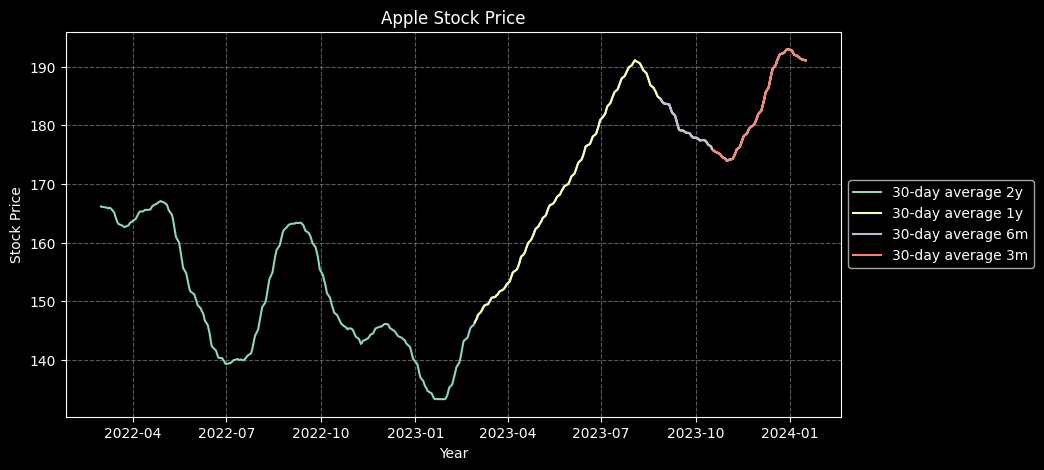

In [29]:
plt.figure(figsize=(10,5))
plt.plot(close_price_2year.rolling(30).mean(), label='30-day average 2y')
plt.plot(close_price_1year.rolling(30).mean(), label='30-day average 1y')
plt.plot(close_price_6m.rolling(30).mean(), label='30-day average 6m')
plt.plot(close_price_3m.rolling(30).mean(), label='30-day average 3m')
plt.title("Apple Stock Price")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### 11. Fundamental analysis

In [30]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12
Metric,Revenue,Revenue Growth,Gross Profit,Gross Margin %,Operating Profit,Operating Margin %,Earnings Per Share,EPS Growth,Dividends Per Share,Dividend Growth,Return on Assets,Return on Equity,Return on Invested Capital
2013,170910.0,9.2,64304.0,37.6,48999.0,28.7,1.42,-10.0,0.41,328.4,19.3,30.6,28.6
2014,182795.0,7.0,70537.0,38.6,52503.0,28.7,1.61,13.6,0.45,11.3,18.0,33.6,27.5
2015,233715.0,27.9,93626.0,40.1,71230.0,30.5,2.31,42.9,0.5,9.3,20.5,46.2,32.3
2016,215639.0,-7.7,84263.0,39.1,60024.0,27.8,2.08,-9.8,0.55,10.1,14.9,36.9,22.9
2017,229234.0,6.3,88186.0,38.5,61344.0,26.8,2.3,10.8,0.6,10.1,13.9,36.9,20.8
2018,265595.0,15.9,101839.0,38.3,70898.0,26.7,2.98,29.4,0.68,13.3,16.1,49.4,25.3
2019,260174.0,-2.0,98392.0,37.8,63930.0,24.6,2.97,-0.3,0.75,10.3,15.7,55.9,26.3
2020,274515.0,5.5,104956.0,38.2,66288.0,24.1,3.28,10.4,0.8,6.0,17.3,73.7,30.5
2021,365817.0,33.3,152836.0,41.8,108949.0,29.8,5.61,71.0,0.85,6.9,28.1,147.4,51.8


In [31]:
df = pd.DataFrame(apple, columns=columns)
df = df.set_index('Metric')
df = df.transpose()

In [32]:
df

Metric,Revenue,Revenue Growth,Gross Profit,Gross Margin %,Operating Profit,Operating Margin %,Earnings Per Share,EPS Growth,Dividends Per Share,Dividend Growth,Return on Assets,Return on Equity,Return on Invested Capital
2013,170910.0,9.2,64304.0,37.6,48999.0,28.7,1.42,-10.0,0.41,328.4,19.3,30.6,28.6
2014,182795.0,7.0,70537.0,38.6,52503.0,28.7,1.61,13.6,0.45,11.3,18.0,33.6,27.5
2015,233715.0,27.9,93626.0,40.1,71230.0,30.5,2.31,42.9,0.50,9.3,20.5,46.2,32.3
2016,215639.0,-7.7,84263.0,39.1,60024.0,27.8,2.08,-9.8,0.55,10.1,14.9,36.9,22.9
2017,229234.0,6.3,88186.0,38.5,61344.0,26.8,2.30,10.8,0.60,10.1,13.9,36.9,20.8
2018,265595.0,15.9,101839.0,38.3,70898.0,26.7,2.98,29.4,0.68,13.3,16.1,49.4,25.3
2019,260174.0,-2.0,98392.0,37.8,63930.0,24.6,2.97,-0.3,0.75,10.3,15.7,55.9,26.3
2020,274515.0,5.5,104956.0,38.2,66288.0,24.1,3.28,10.4,0.80,6.0,17.3,73.7,30.5
2021,365817.0,33.3,152836.0,41.8,108949.0,29.8,5.61,71.0,0.85,6.9,28.1,147.4,51.8
2022,394328.0,7.8,170782.0,43.3,119437.0,30.3,6.11,8.9,0.90,5.9,28.4,175.5,55.7


In [33]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Gross Profit', 'Gross Margin %',
       'Operating Profit', 'Operating Margin %', 'Earnings Per Share',
       'EPS Growth', 'Dividends Per Share', 'Dividend Growth',
       'Return on Assets', 'Return on Equity', 'Return on Invested Capital'],
      dtype='object', name='Metric')

In [34]:
df.columns.str.replace(' ','_')

Index(['Revenue', 'Revenue_Growth', 'Gross_Profit', 'Gross_Margin_%',
       'Operating_Profit', 'Operating_Margin_%', 'Earnings_Per_Share',
       'EPS_Growth', 'Dividends_Per_Share', 'Dividend_Growth',
       'Return_on_Assets', 'Return_on_Equity', 'Return_on_Invested_Capital'],
      dtype='object', name='Metric')

##### Apple Revenue since 2013 to 2022 is growing and look like company is still growing.

In [35]:
df.Revenue

2013    170910.0
2014    182795.0
2015    233715.0
2016    215639.0
2017    229234.0
2018    265595.0
2019    260174.0
2020    274515.0
2021    365817.0
2022    394328.0
Name: Revenue, dtype: float64

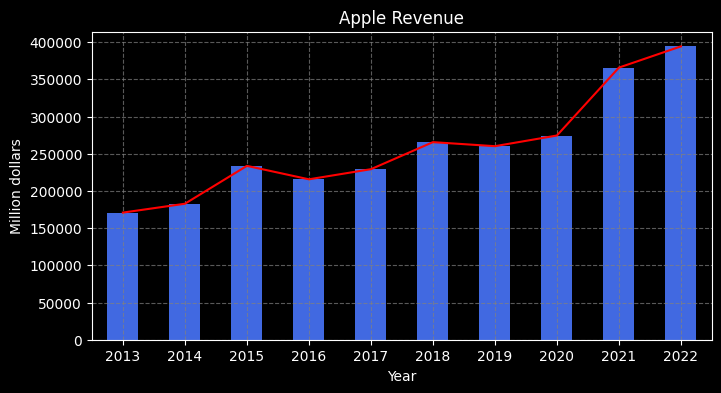

In [36]:
plt.figure(figsize=(8,4))
df.Revenue.plot.bar(color="royalblue")
df.Revenue.plot(color="red")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.title("Apple Revenue")
plt.xlabel("Year")
plt.ylabel("Million dollars");

##### Revenue growth is bit up and down as comapre to revenue generated.

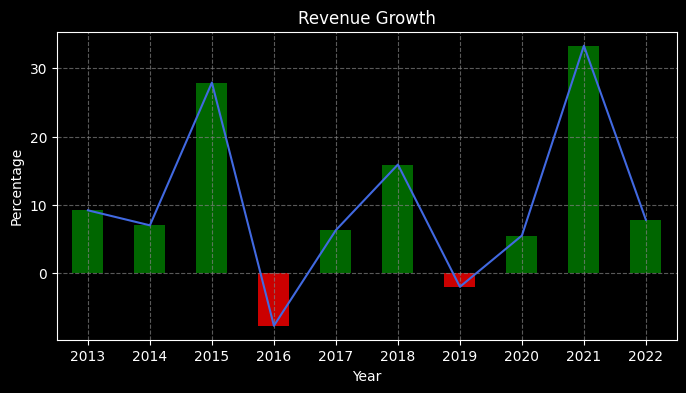

In [37]:
plt.figure(figsize=(8,4))
df['Revenue Growth'].plot.bar(color=["red" if x < 0 else "green" for x in df['Revenue Growth']], alpha=0.8)
df['Revenue Growth'].plot(color="royalblue")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.title("Revenue Growth")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()

In [38]:
df['Gross Profit']

2013     64304.0
2014     70537.0
2015     93626.0
2016     84263.0
2017     88186.0
2018    101839.0
2019     98392.0
2020    104956.0
2021    152836.0
2022    170782.0
Name: Gross Profit, dtype: float64

##### Gross profit is positive and look like operation is in good shape

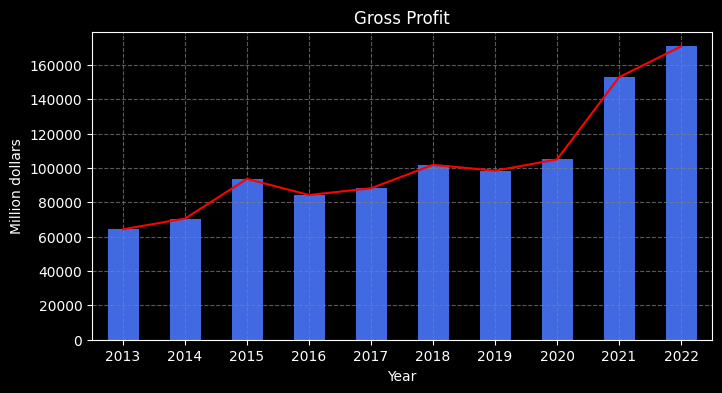

In [39]:
plt.figure(figsize=(8,4))
df['Gross Profit'].plot.bar(color="royalblue")
df['Gross Profit'].plot(color="red")
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.title("Gross Profit")
plt.xlabel("Year")
plt.ylabel("Million dollars")
plt.show()

##### Bar plot for understanding relationship 

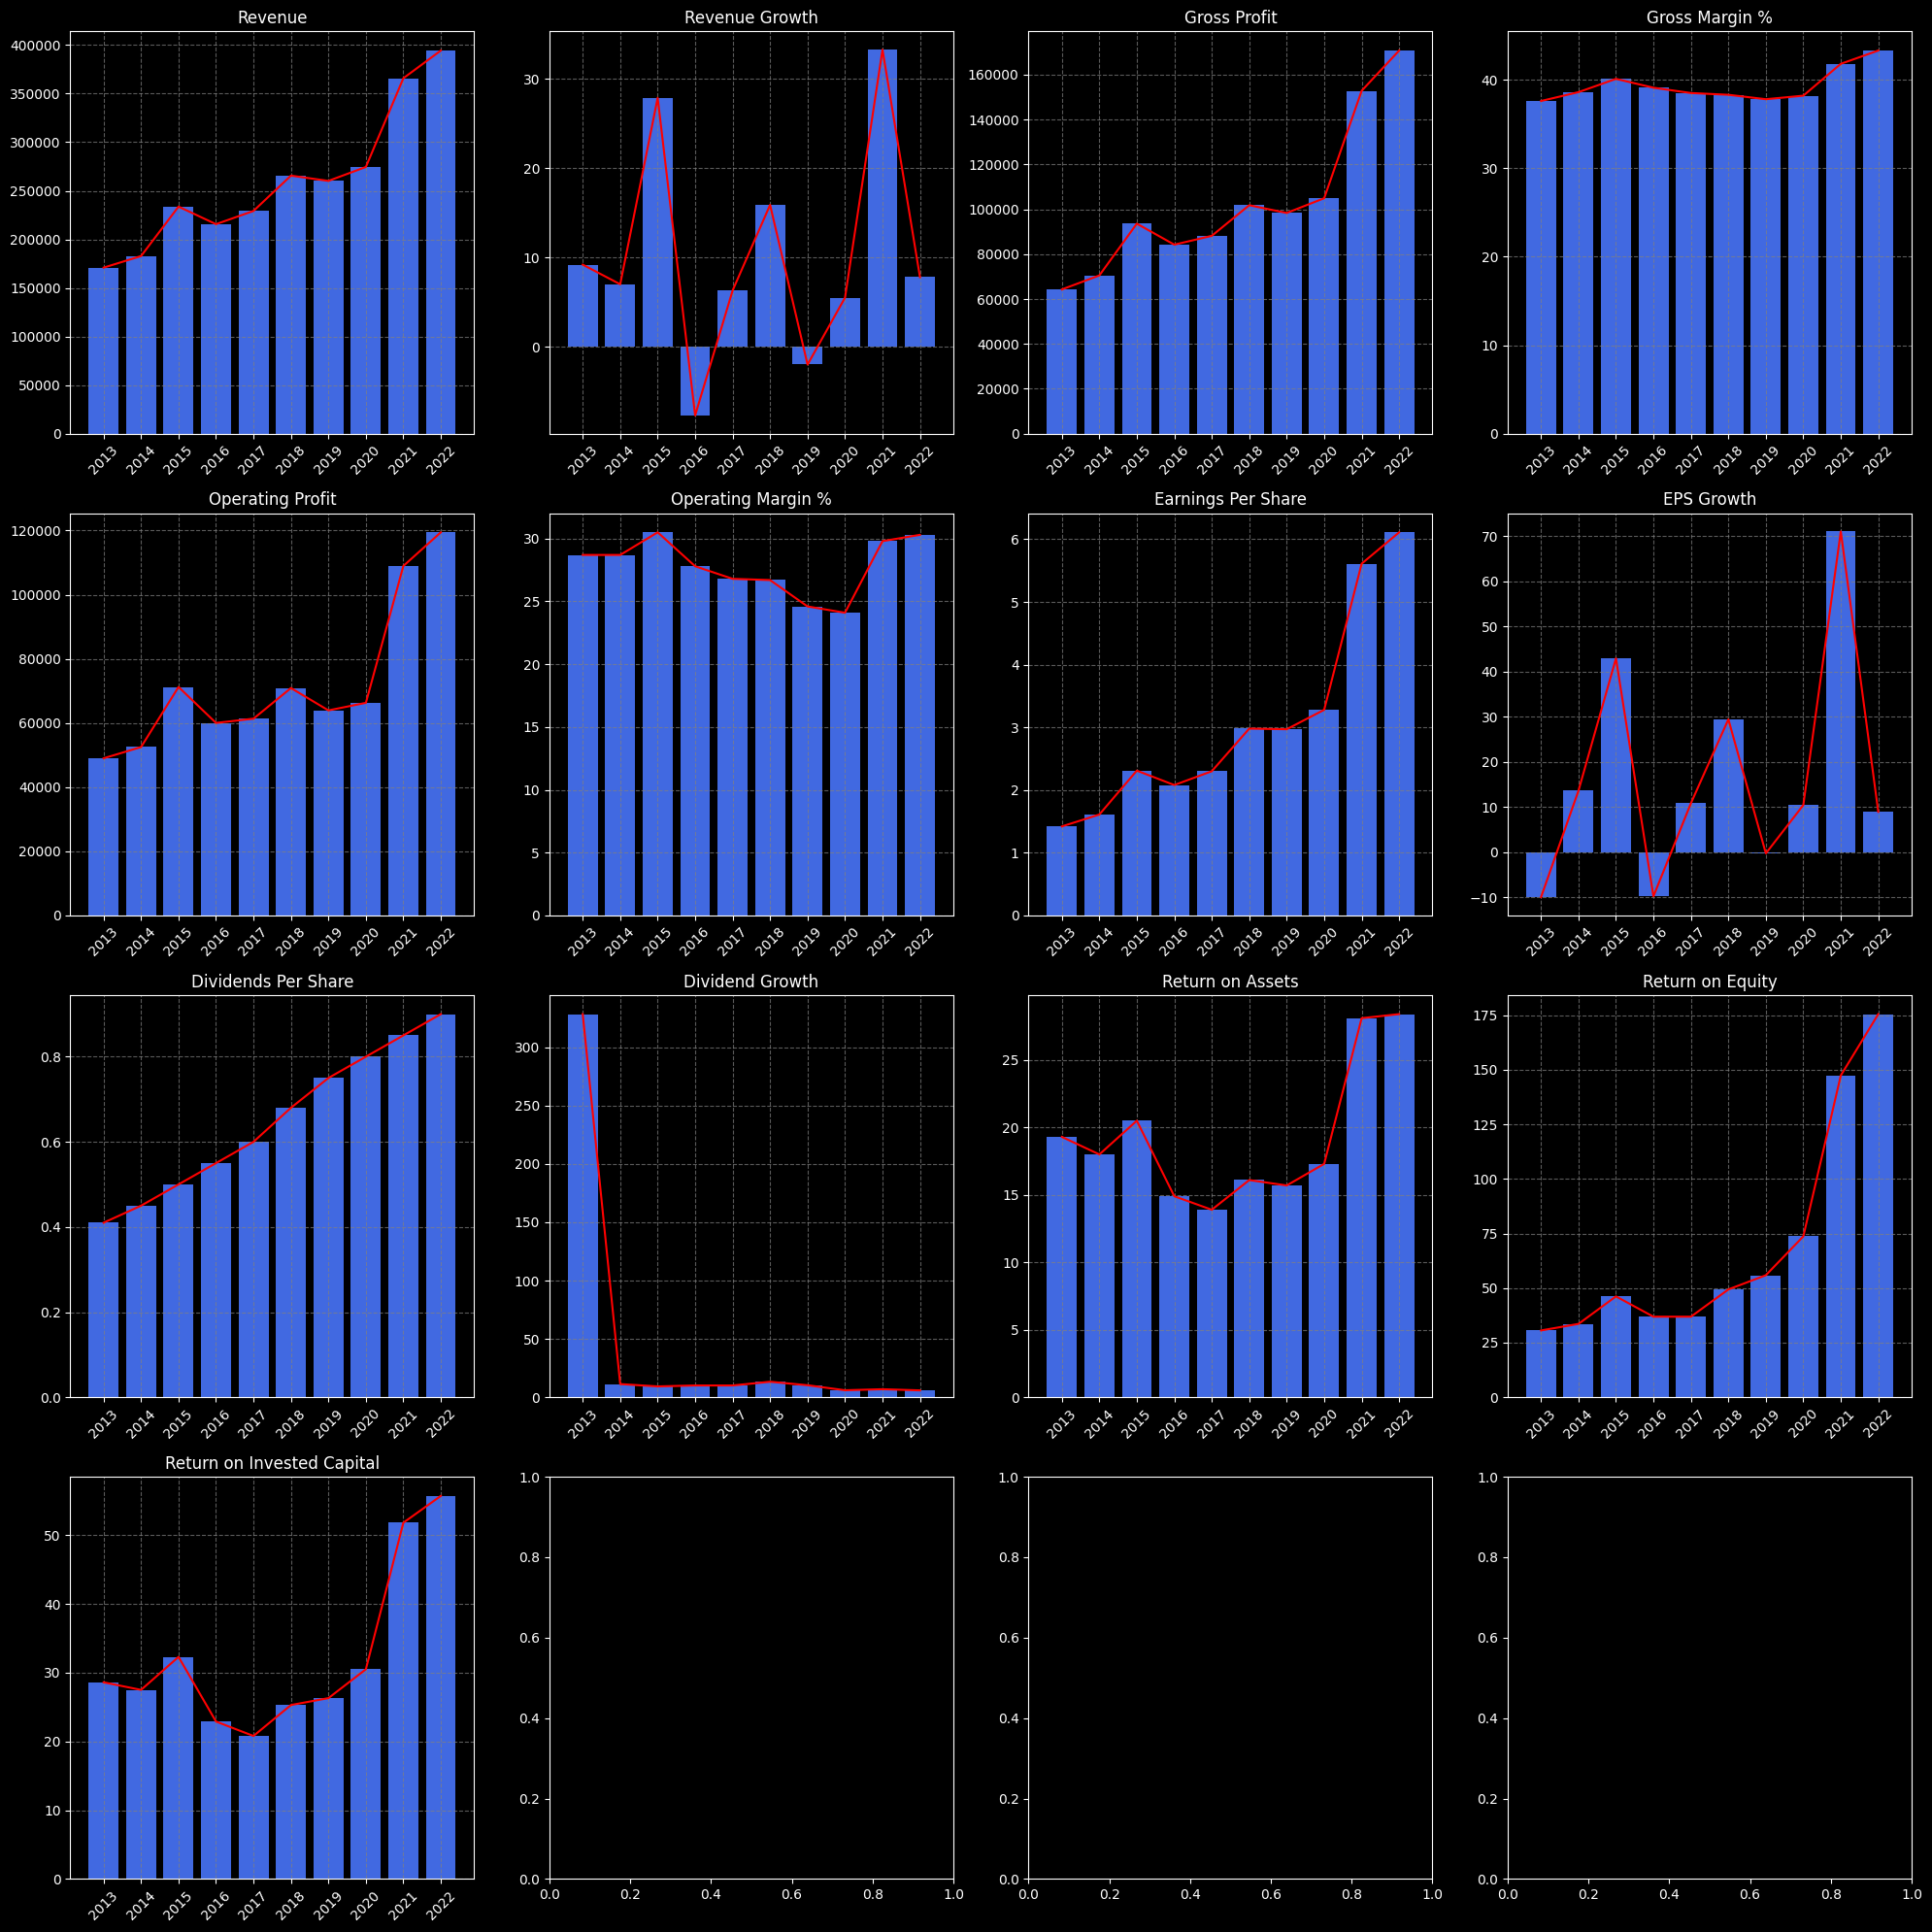

In [40]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
metrics = ['Revenue', 
           'Revenue Growth', 
           'Gross Profit', 
           'Gross Margin %',           
           'Operating Profit', 
           'Operating Margin %', 
           'Earnings Per Share',
           'EPS Growth', 
           'Dividends Per Share', 
           'Dividend Growth',           
           'Return on Assets', 
           'Return on Equity', 
           'Return on Invested Capital']

#loop through metrics 
for i, metric in enumerate(metrics):
    row = i // 4
    col = i % 4
    
    ax[row][col].plot(df.index, df[metric], color='red')
    ax[row][col].bar(df.index, df[metric], color='royalblue')
    ax[row][col].set_title(metric)
    ax[row][col].grid(linestyle='--', color='gray', alpha=0.7)
    ax[row][col].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

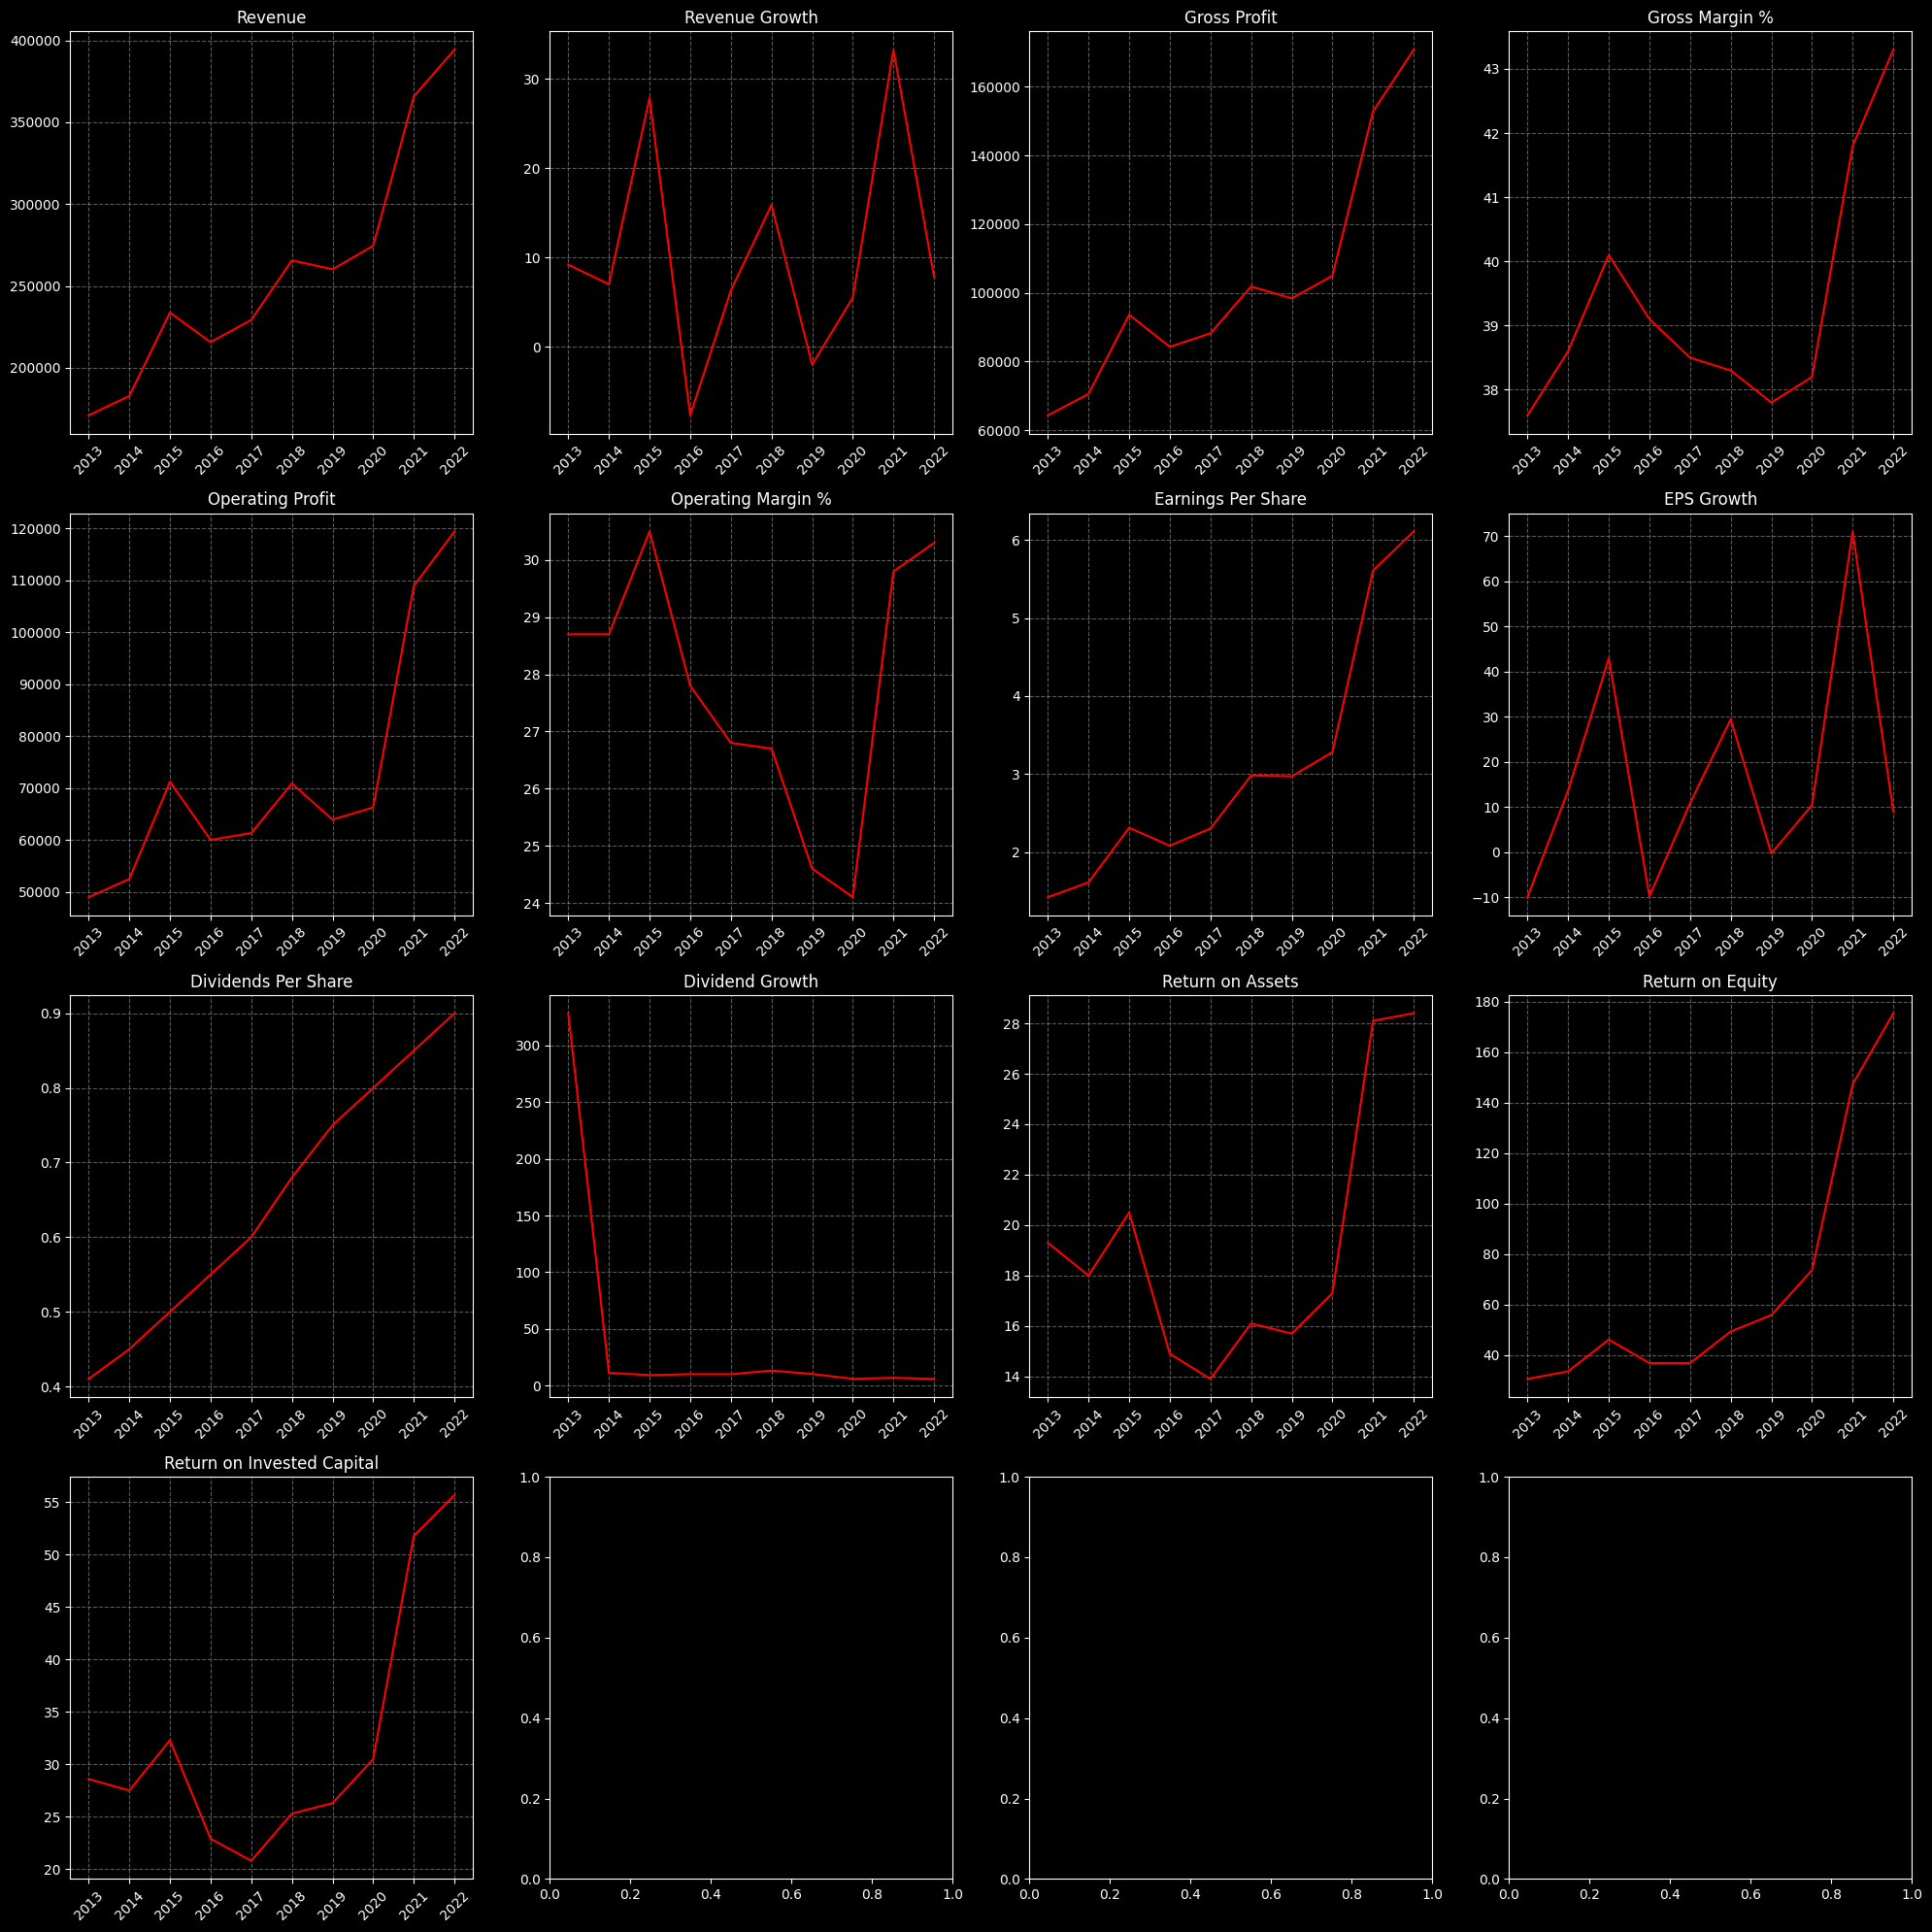

In [41]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
metrics = ['Revenue', 
           'Revenue Growth', 
           'Gross Profit', 
           'Gross Margin %',           
           'Operating Profit', 
           'Operating Margin %', 
           'Earnings Per Share',
           'EPS Growth', 
           'Dividends Per Share', 
           'Dividend Growth',           
           'Return on Assets', 
           'Return on Equity', 
           'Return on Invested Capital']

for i, metric in enumerate(metrics):
    row = i // 4
    col = i % 4
    ax[row][col].plot(df[metric], color='red')
    ax[row][col].set_title(metric)
    ax[row][col].grid(linestyle='--', color='gray', alpha=0.7)
    ax[row][col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Apple is one of the largest technology companies in the world, employing over 120,000 workers globally. The company has a significant impact on the modern society in several ways.

First, Apple is known for its innovative products and services that have transformed the way people communicate, consume media, and interact with technology. The company has a reputation for producing high-quality, user-friendly products that have become an integral part of people's daily lives.

Second, Apple's products are manufactured in modern, state-of-the-art facilities that use cutting-edge technology and robotics to produce millions of products each year. The company's manufacturing process is highly automated, making it one of the most efficient in the world. This helps to ensure that products are produced quickly, accurately, and to a high standard, which is essential for meeting the needs of customers.

Finally, Apple's workers are highly skilled and trained professionals who play a critical role in the company's success. They work in a wide range of roles, including research and development, manufacturing, marketing, and sales. By contributing their skills and expertise, Apple's workers help the company to create innovative products and services that have a positive impact on the world.

## Reference

https://mytradingskills.com/support-resistance-levels
    
https://investor.apple.com/investor-relations/default.aspx